In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:

class grid_mrf:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.values = np.random.rand(rows,cols) > 0.5 
        self.values_y = None

    def get_point_energies(self, row, col, return_res=False):
        neighbors = []
        if row > 0:
            neighbors.append(self.values[row-1,col])
        if row < self.rows-1:
            neighbors.append(self.values[row+1, col])
        if col > 0:
            neighbors.append(self.values[row,col-1])
        if col < self.cols-1:
            neighbors.append(self.values[row,col+1])
        
        res = sum(neighbors), len(neighbors)-sum(neighbors)
        
        p_pos = np.exp(res[0])/(np.exp(res[0]) + np.exp(res[1]))
        if return_res:
            return res
        return p_pos
    
    def gibbs_traverse(self):
        for i in range(200):
            points = np.arange(self.rows*self.cols,dtype=int)
            np.random.shuffle(points)
            for point in points:
                row = int(np.floor(point/self.rows))
                col = np.mod(point,self.cols)
                p_pos = self.get_point_energies(row, col)
                new_val = np.random.rand() < p_pos
                self.values[row,col]=new_val
            if i % 20 == 19:
                plt.matshow(self.values)
                
    def genernate_y(self):
        y = np.random.randn(self.rows,self.cols)
        y = y + self.values.astype(float)
        self.values_y = y
        
    def calculate_marginal_x_given_y(self):
        # assuming that "marginal" goes for each x_i separately
        ret = zeros(self.rows, self.cols)
        for row in self.rows:
            for col in self.cols:
                p_x = self.get_point_energies(row,col,True)
                y = self.values_y[row,col]
                z0 = -0.5* y**2
                z1 = -0.5 *(1.-y) ** 2
                p_y = np.exp(p_x[0]+z1)/(np.exp(z1+p_x[0])+np.exp(z0+p_x[1]))
                ret[row, col] = p_y
        return ret
    
    def gibbs_

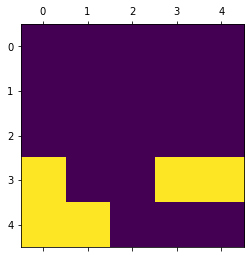

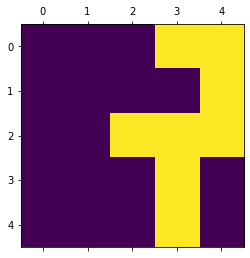

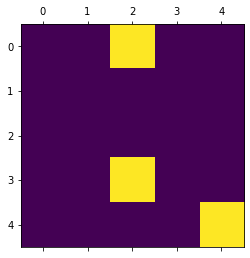

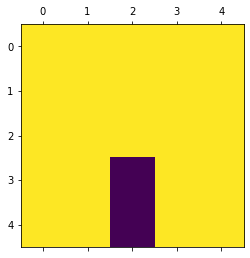

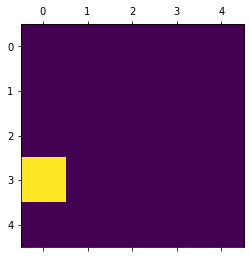

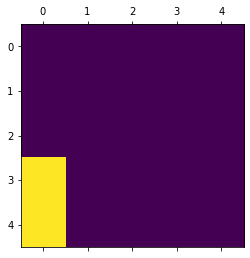

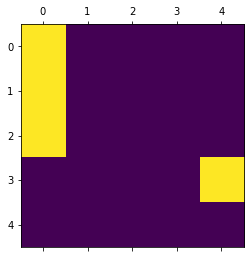

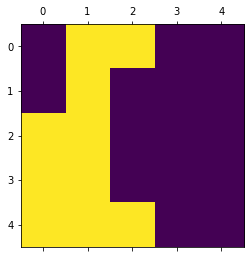

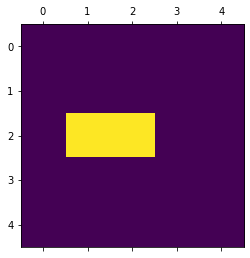

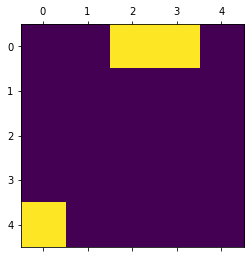

In [24]:
gr = grid_mrf(5,5)
gr.gibbs_traverse()

In [26]:
gr.values.astype(float)


array([[0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
(1.+.6)**2


2.5600000000000005

In [30]:
1.6*1.6

2.5600000000000005